In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import seaborn as sns
sns.set_style("whitegrid")

In [11]:
df = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_EURUSD.csv")
df

,time,open,high,low,close,tick_volume,low_time,high_time
0,2015-01-02 12:00:00,1.20467,1.20600,1.20347,1.20377,14827,2015-01-02 15:36:00,2015-01-02 12:48:00
1,2015-01-02 16:00:00,1.20377,1.20437,1.20069,1.20131,19160,2015-01-02 19:36:00,2015-01-02 16:00:00
2,2015-01-02 20:00:00,1.20133,1.20154,1.20011,1.20029,9335,2015-01-02 23:12:00,2015-01-02 20:00:00
3,2015-01-03 00:00:00,1.20030,1.20055,1.19997,1.20014,1351,2015-01-03 00:24:00,2015-01-03 00:00:00
4,2015-01-05 00:00:00,1.19454,1.19755,1.18642,1.19624,13941,2015-01-05 00:48:00,2015-01-05 03:36:00
...,...,...,...,...,...,...,...,...
13671,2023-09-19 16:00:00,1.06997,1.07014,1.06785,1.06848,13607,2023-09-19 19:36:00,2023-09-19 16:00:00
13672,2023-09-19 20:00:00,1.06848,1.06918,1.06761,1.06790,6544,2023-09-19 22:00:00,2023-09-19 20:24:00
13673,2023-09-20 00:00:00,1.06790,1.06860,1.06768,1.06849,2478,2023-09-20 00:00:00,2023-09-20 03:36:00
13674,2023-09-20 04:00:00,1.06849,1.06897,1.06783,1.06786,4333,2023-09-20 06:24:00,2023-09-20 05:12:00


In [12]:
def auto_corr(df, col, n=50, lag=10):
    """
    Calculates the autocorrelation for a given column in a Pandas DataFrame, using a specified window size and lag.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing the column for which to compute autocorrelation.
    - col (str): The name of the column in the DataFrame for which to calculate autocorrelation.
    - n (int, optional): The size of the rolling window for calculation. Default is 50.
    - lag (int, optional): The lag step to be used when computing autocorrelation. Default is 10.

    Returns:
    - pd.DataFrame: A new DataFrame with an additional column named 'autocorr_{lag}', where {lag} is the provided lag value. This column contains the autocorrelation values.
    """
    df_copy = df.copy()
    df_copy[f'autocorr_{lag}'] = df_copy[col].rolling(window=n, min_periods=n, center=False).apply(lambda x: x.autocorr(lag=lag), raw=False)
    return df_copy


In [13]:
df = auto_corr(df,"close",n=50,lag=10)
df

,time,open,high,low,close,tick_volume,low_time,high_time,autocorr_10
0,2015-01-02 12:00:00,1.20467,1.20600,1.20347,1.20377,14827,2015-01-02 15:36:00,2015-01-02 12:48:00,NaN
1,2015-01-02 16:00:00,1.20377,1.20437,1.20069,1.20131,19160,2015-01-02 19:36:00,2015-01-02 16:00:00,NaN
2,2015-01-02 20:00:00,1.20133,1.20154,1.20011,1.20029,9335,2015-01-02 23:12:00,2015-01-02 20:00:00,NaN
3,2015-01-03 00:00:00,1.20030,1.20055,1.19997,1.20014,1351,2015-01-03 00:24:00,2015-01-03 00:00:00,NaN
4,2015-01-05 00:00:00,1.19454,1.19755,1.18642,1.19624,13941,2015-01-05 00:48:00,2015-01-05 03:36:00,NaN
...,...,...,...,...,...,...,...,...,...
13671,2023-09-19 16:00:00,1.06997,1.07014,1.06785,1.06848,13607,2023-09-19 19:36:00,2023-09-19 16:00:00,0.082399
13672,2023-09-19 20:00:00,1.06848,1.06918,1.06761,1.06790,6544,2023-09-19 22:00:00,2023-09-19 20:24:00,0.110672
13673,2023-09-20 00:00:00,1.06790,1.06860,1.06768,1.06849,2478,2023-09-20 00:00:00,2023-09-20 03:36:00,0.125906
13674,2023-09-20 04:00:00,1.06849,1.06897,1.06783,1.06786,4333,2023-09-20 06:24:00,2023-09-20 05:12:00,0.150453


<AxesSubplot:>

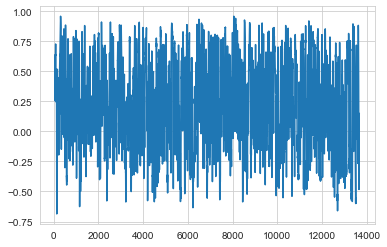

In [14]:
df["autocorr_10"].plot()